In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('revenue_prediction.csv')
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [12]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [13]:
# dropping the irrelevant columns

df = df.drop(columns=['Id','Name', 'Franchise', 'Category', 'City', 'No_Of_Item'])
df.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [14]:
df.shape

(100, 2)

In [15]:
# creating dependent and independent variables

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values  # target column

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80,)
(20,)


In [18]:
# Training the Simple Linear Regression model on the Training set

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
# generatin Predictions

y_preds=lr.predict(x_test)
y_preds

array([6351103.23642516, 5984998.65773576, 4032440.90472562,
       3788371.18559936, 4276510.62385189, 3910406.04516249,
       4032440.90472562, 3666336.32603622, 3788371.18559936,
       6107033.5172989 , 5740928.93860949, 2934127.16865742,
       3178196.88778369, 2079883.15171548, 3422266.60690995,
       4520580.34297816, 4642615.20254129, 1469708.85389981,
       1347673.99433668, 1713778.57302608])

In [25]:
preds2=lr.predict(x_train)
preds2

array([ 7693486.69161964,  1713778.57302608,  1957848.29215235,
        5252789.50035696,  3422266.60690995,  3178196.88778369,
        7571451.8320565 ,  7083312.39380397,  5862963.79817263,
        2323952.87084175,  5496859.21948323,  8791800.42768784,
        8181626.12987217,  5008719.78123069,  3422266.60690995,
        5374824.35992009,  1469708.85389981,  1347673.99433668,
        3788371.18559936, 12574881.07414499,  9768079.30419291,
        4276510.62385189,  4642615.20254129,   737499.69652101,
        5862963.79817263,  1713778.57302608,  4154475.76428876,
        3788371.18559936,  5618894.07904636,  5130754.64079383,
       10134183.88288231,  2445987.73040488,  9279939.86594037,
        5862963.79817263,  5252789.50035696,  3666336.32603622,
        5496859.21948323,  2323952.87084175,  2812092.30909428,
        1957848.29215235,  1957848.29215235,  4764650.06210443,
        4886684.92166756,  2568022.58996802,  1713778.57302608,
        4032440.90472562,  4398545.48341

Text(0, 0.5, 'Revenue')

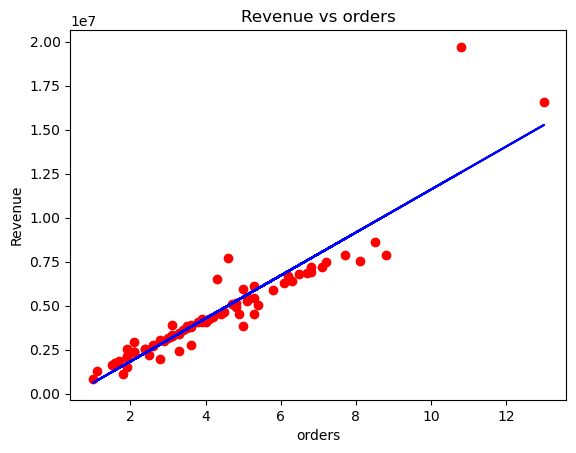

In [27]:
# visualising Training set results

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,preds2,color='blue')
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

Text(0, 0.5, 'Revenue')

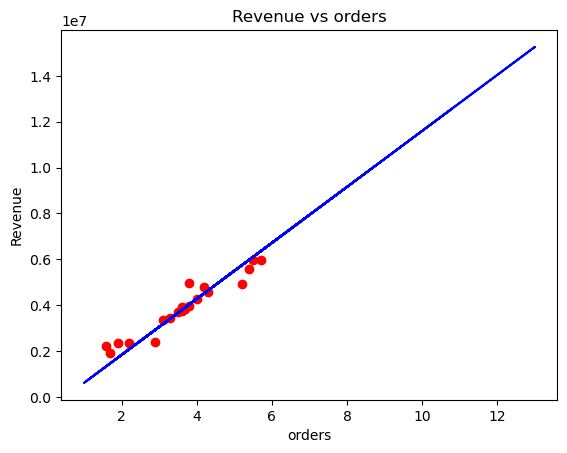

In [29]:
# visualising Test set results

plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,preds2,color='blue')
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

In [33]:
# testing the accuracy of moddel:

from sklearn.metrics import r2_score

score = r2_score(y_preds,y_test)
score

0.9109612329066814

In [ ]:
# Therefore the revenue is supposed to be increasing as the accuracy is high for the predicted model.